# **DeFungi Dataset**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import shutil
import os

In [31]:
initial_dataset_dir = "defungi"

# Checking whether the dataset has been successfully extracted
os.listdir(initial_dataset_dir)

['H1', 'H2', 'H3', 'H5', 'H6']

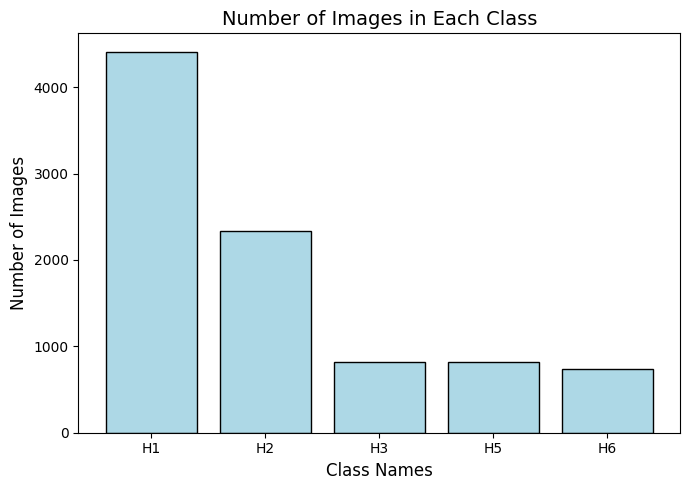

In [34]:
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(initial_dataset_dir):
    class_path = os.path.join(initial_dataset_dir, class_folder)

    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Gettting class names and counts
classes = list(class_image_counts.keys())
counts = list(class_image_counts.values())

# Plotting the bar graph
plt.figure(figsize=(7,5))
plt.bar(classes, counts, color='lightblue', edgecolor='black')

plt.xlabel("Class Names", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Number of Images in Each Class", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Directories
initial_dataset_dir = "defungi"
balanced_dir = "balanced_dataset"


# # ###----------Do not run(This should run only once) -------------###

# # Target size for all classes
# target_size = 804

# # Ensure the balanced directory exists
# os.makedirs(balanced_dir, exist_ok=True)

# # Data augmentation setup
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Dictionary to store the count of images in each class
# class_image_counts = {
#     class_folder: len(os.listdir(os.path.join(initial_dataset_dir, class_folder)))
#     for class_folder in os.listdir(initial_dataset_dir)
#     if os.path.isdir(os.path.join(initial_dataset_dir, class_folder))
# }

# # Balancing the dataset
# for class_folder, num_images in class_image_counts.items():
#     class_path = os.path.join(initial_dataset_dir, class_folder)
#     balanced_class_path = os.path.join(balanced_dir, class_folder)
#     os.makedirs(balanced_class_path, exist_ok=True)

#     image_files = os.listdir(class_path)

#     # For undersampling classes
#     if num_images > target_size:
#         print(f"Undersampling {class_folder}: Reducing {num_images} to {target_size} images.")
#         sampled_files = random.sample(image_files, target_size)
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)
#     # For classes with fewer images than target size Copying existing images
#     else:
#         sampled_files = image_files
#         for img_file in sampled_files:
#             shutil.copy(os.path.join(class_path, img_file), balanced_class_path)

#         # Augment underrepresented classes
#         num_to_generate = target_size - num_images
#         print(f"Augmenting {class_folder}: Generating {num_to_generate} images.")
#         random.shuffle(image_files)  # Shuffling to get different images each time

#         generated_count = 0
#         image_idx = 0

#         while generated_count < num_to_generate:
#             img_file = image_files[image_idx % len(image_files)]  # Move to next image
#             img_path = os.path.join(class_path, img_file)
#             img = tf.keras.preprocessing.image.load_img(img_path)
#             img_array = tf.keras.preprocessing.image.img_to_array(img)
#             img_array = img_array.reshape((1,) + img_array.shape)

#             # Generate only one augmented image per image
#             for batch in datagen.flow(
#                 img_array, batch_size=1, save_to_dir=balanced_class_path,
#                 save_prefix='aug', save_format='jpeg'
#             ):
#                 generated_count += 1
#                 if generated_count >= num_to_generate:
#                     break

#             # Move to next image for augmentation
#             image_idx += 1

# # Verify the results
# for class_folder in os.listdir(balanced_dir):
#     class_path = os.path.join(balanced_dir, class_folder)
#     num_balanced_images = len(os.listdir(class_path))
#     print(f"Class: {class_folder}, Balanced Images: {num_balanced_images}")


Undersampling H1: Reducing 4404 to 804 images.
Undersampling H2: Reducing 2334 to 804 images.
Undersampling H3: Reducing 819 to 804 images.
Undersampling H5: Reducing 818 to 804 images.
Augmenting H6: Generating 65 images.
Class: H1, Balanced Images: 804
Class: H2, Balanced Images: 804
Class: H3, Balanced Images: 804
Class: H5, Balanced Images: 804
Class: H6, Balanced Images: 804


In [ ]:
# # ###---------- Do not run (has already done) -------------###

# # Set paths
# dataset_dir = "balanced_dataset"
# classes = os.listdir(dataset_dir)

# #directories for training, validation, and testing splits
# main_dir = 'splitted_balanced_dataset'
# os.makedirs(main_dir, exist_ok=True)

# train_dir = os.path.join(main_dir, 'train')
# val_dir = os.path.join(main_dir, 'val')
# test_dir = os.path.join(main_dir, 'test')

# # Create folders for each class in train, val, and test directories
# for class_name in classes:
#     os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# # Split the dataset for each class
# for class_name in classes:
#     class_path = os.path.join(dataset_dir, class_name)
#     images = os.listdir(class_path)
#     np.random.shuffle(images)

#     # Split images into 60% train, 20% validation, 20% test
#     train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
#     val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

#     # Move images to the respective directories
#     for img in train_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

#     for img in val_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

#     for img in test_images:
#         shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# print("Dataset splitting done.")

Dataset splitting done.


In [ ]:
# # ###----------Do not run (Already done)-------------###

# def check_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             try:
#                 with Image.open(file_path) as img:
#                     img.verify()  # Check if it's a valid image
#             except (IOError, SyntaxError):
#                 print(f"Invalid file: {file_path}")
#                 os.remove(file_path)  # Remove problematic files

# # Check both training and validation directories
# check_images(main_dir + "/train")
# check_images(main_dir + "/val")

In [45]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [46]:
train_dataset = train.flow_from_directory(main_dir+"/train",target_size=(150,150),batch_size=32,class_mode='sparse')

validation_dataset = validation.flow_from_directory(main_dir+"/val",target_size=(150,150), batch_size=32,class_mode='sparse')

Found 2410 images belonging to 5 classes.
Found 805 images belonging to 5 classes.


In [47]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  2410
Validation Dataset:  805


In [48]:
class_indices = train_dataset.class_indices
print(class_indices)

{'H1': 0, 'H2': 1, 'H3': 2, 'H5': 3, 'H6': 4}


0.0
[[[0.5568628  0.5686275  0.53333336]
  [0.5294118  0.5411765  0.5058824 ]
  [0.5019608  0.5254902  0.48627454]
  ...
  [0.50980395 0.5372549  0.4666667 ]
  [0.5019608  0.5058824  0.45098042]
  [0.4784314  0.45882356 0.4431373 ]]

 [[0.5254902  0.5372549  0.5019608 ]
  [0.50980395 0.52156866 0.48627454]
  [0.4901961  0.5019608  0.4666667 ]
  ...
  [0.53333336 0.54901963 0.4901961 ]
  [0.5411765  0.5294118  0.49411768]
  [0.52156866 0.50980395 0.4901961 ]]

 [[0.52156866 0.5254902  0.49411768]
  [0.50980395 0.50980395 0.4784314 ]
  [0.48235297 0.47058827 0.4431373 ]
  ...
  [0.5294118  0.53333336 0.5019608 ]
  [0.5372549  0.5254902  0.5058824 ]
  [0.53333336 0.5294118  0.50980395]]

 ...

 [[0.454902   0.47450984 0.45098042]
  [0.44705886 0.4666667  0.4431373 ]
  [0.45098042 0.47058827 0.44705886]
  ...
  [0.56078434 0.56078434 0.5294118 ]
  [0.5529412  0.5529412  0.52156866]
  [0.5568628  0.5568628  0.50980395]]

 [[0.45882356 0.4784314  0.454902  ]
  [0.454902   0.47450984 0.450980

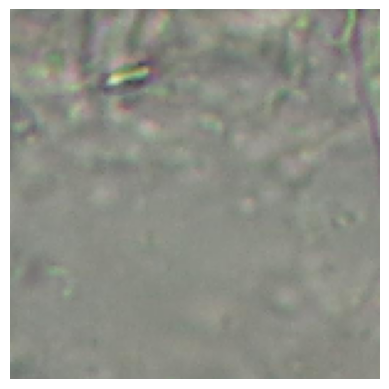

In [49]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])

plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),

    tf.keras.layers.Dense(units=9, activation='softmax')
])

C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model_fit = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20
)

Epoch 1/20


C:\Users\asith\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 924ms/step - accuracy: 0.3173 - loss: 1.7668 - val_accuracy: 0.3578 - val_loss: 1.9966
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 939ms/step - accuracy: 0.4674 - loss: 1.3476 - val_accuracy: 0.4273 - val_loss: 1.9318
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 69s 907ms/step - accuracy: 0.5417 - loss: 1.1798 - val_accuracy: 0.5255 - val_loss: 1.8605
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 69s 912ms/step - accuracy: 0.5990 - loss: 1.0955 - val_accuracy: 0.4944 - val_loss: 1.6483
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 69s 907ms/step - accuracy: 0.6049 - loss: 1.0391 - val_accuracy: 0.5950 - val_loss: 1.4567
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 71s 940ms/step - accuracy: 0.6433 - loss: 0.9431 - val_accuracy: 0.6062 - val_loss: 1.1763
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 73s 963ms/step - accuracy: 0.6669 - loss: 0.8431 - val_accuracy: 0.5739 - val_loss: 1.1870
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 74s 972ms/step - accuracy: 0.7057 - loss: 0.7752 - val_accuracy: 0.634

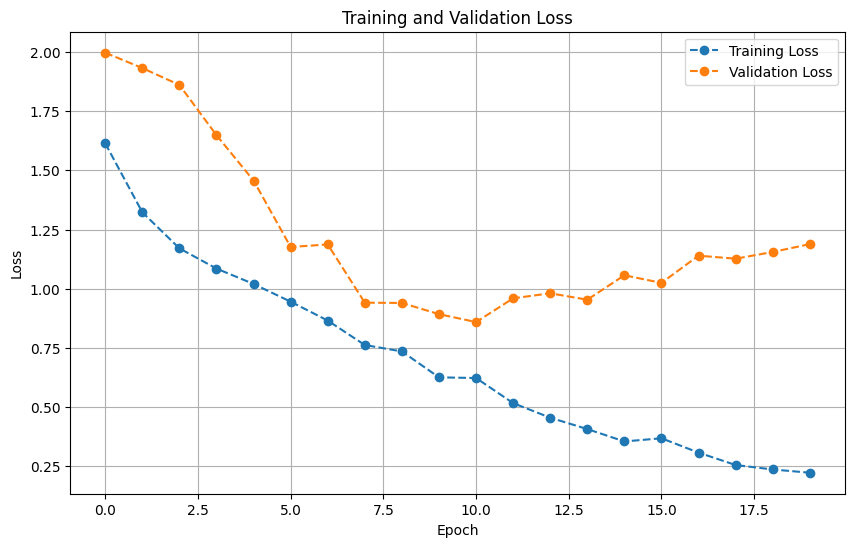

In [53]:
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(model_fit.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
test = ImageDataGenerator(rescale=1/255)


test_dataset = test.flow_from_directory(main_dir + "/test",target_size=(150, 150),batch_size=32,class_mode='sparse')

#Evaluate the model on the test dataset
from sklearn.metrics import precision_score, recall_score, classification_report

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

# Obtain true labels and predicted labels
y_true = []
y_pred = []

# for i, batch in enumerate(test_dataset):
#     inputs, labels = batch  
#     y_true.extend(labels if isinstance(labels, (list, np.ndarray)) else labels.numpy())
#     predictions = model.predict(inputs)
#     y_pred.extend(predictions.argmax(axis=1))  

# Calculate precision and recall
# precision = precision_score(y_true, y_pred, average="weighted")
# recall = recall_score(y_true, y_pred, average="weighted")

# Print the evaluation results
print(f"Model Evaluation Results:")
print(f"- Test Loss: {test_loss:.4f}")
print(f"- Test Accuracy: {test_accuracy:.4f}")
# print(f"- Precision: {precision:.4f}")
# print(f"- Recall: {recall:.4f}")

Found 805 images belonging to 5 classes.
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.6365 - loss: 1.2533
Model Evaluation Results:
- Test Loss: 1.2386
- Test Accuracy: 0.6460


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 150ms/step


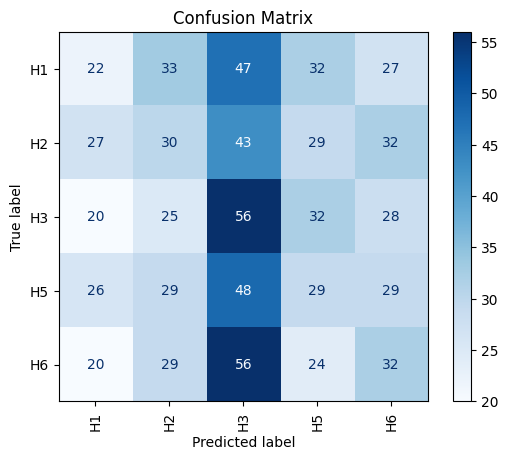

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate predictions
test_dataset.reset()  # Reset the generator to start from the first batch
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Step 2: Get true labels
y_true = test_dataset.classes  # Actual labels from the dataset

# Step 3: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()


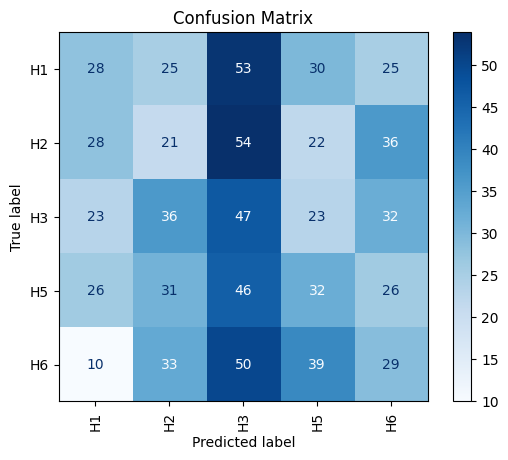

In [62]:
lst = np.array([])

for i in range(len(test_dataset)):
    lst = np.concatenate((lst, test_dataset[i][1]))

# print(lst)
# print(y_pred_classes)



# Step 3: Compute confusion matrix
cm = confusion_matrix(lst, y_pred_classes)

# Step 4: Display confusion matrix
labels = list(test_dataset.class_indices.keys())  # Class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

plt.title("Confusion Matrix")
plt.show()